Comprehensive Autoimmune Disorder Dataset - Exploratory Data Analysis

The dataset was downloaded from Kaggle website: https://www.kaggle.com/datasets/abdullahragheb/all-autoimmune-disorder-10k/data

<span style="color:yellow; font-size:20px;">2. EDA.</span>

In [22]:
#libraries
import pandas as pd
import numpy as np
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# Connection to database
db_name = 'db_autoimmune_disorders.db'
conn = sqlite3.connect(db_name)

# Import data to DataFrame
query = "SELECT t.*,d.* FROM tbl_all_research_results t LEFT JOIN tbl_disorders_description d ON t.Diagnosis = d.Diseases_eng;"
df= pd.read_sql_query(query, conn)


# close connection
conn.close()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12500 entries, 0 to 12499
Data columns (total 86 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Patient_ID                            12500 non-null  int64  
 1   Age                                   12500 non-null  int64  
 2   Gender                                12500 non-null  object 
 3   Diagnosis                             12500 non-null  object 
 4   Sickness_Duration_Months              12500 non-null  int64  
 5   RBC_Count                             12500 non-null  float64
 6   Hemoglobin                            12500 non-null  float64
 7   Hematocrit                            12500 non-null  float64
 8   MCV                                   12500 non-null  float64
 9   MCH                                   12500 non-null  float64
 10  MCHC                                  12500 non-null  float64
 11  RDW            

In [4]:
df.head()

,Patient_ID,Age,Gender,Diagnosis,Sickness_Duration_Months,RBC_Count,Hemoglobin,Hematocrit,MCV,MCH,...,Anti_parietal_cell,Progesterone_antibodies,Anti_Sm,Diseases_ID,Diseases_eng,Diseases_pl,Diseases_group,Description_eng,Description_pl,Recommendation
0,1,65,Female,Linear IgA disease,26,3.54,13.18,44.35,99.85,31.80,...,0,0,0,1,Linear IgA disease,Linijna choroba IgA,Skin and Mucosal Diseases,Linear IgA disease is a rare autoimmune disord...,Linijna choroba IgA to rzadkie zaburzenie auto...,Consult dermatologist
1,2,61,Male,Dermatomyositis,106,4.97,14.73,42.39,94.86,29.94,...,0,0,0,2,Dermatomyositis,Dermatomyositis,Musculoskeletal Diseases,Dermatomyositis is an inflammatory disease cha...,Dermatomyositis to choroba zapalna charakteryz...,Consult rheumatologist
2,3,42,Male,Ord's thyroiditis,6,3.91,13.66,42.41,88.26,29.43,...,0,0,0,3,Ord's thyroiditis,Zapalenie tarczycy Orda,Thyroid and Endocrine Diseases,Ord's thyroiditis is a rare form of thyroiditi...,Zapalenie tarczycy Orda to rzadka forma zapale...,Endocrinologist visit
3,4,45,Female,Restless legs syndrome,11,4.57,14.96,40.10,85.95,27.42,...,0,0,0,4,Restless legs syndrome,Zespół niespokojnych nóg,Neurological Diseases,Restless legs syndrome is a condition that cau...,"Zespół niespokojnych nóg to stan, który powodu...",See neurologist
4,5,78,Female,Autoimmune polyendocrine syndrome type 2 (APS2),30,4.88,11.21,37.58,93.16,29.87,...,0,0,0,5,Autoimmune polyendocrine syndrome type 2 (APS2),Zespół poliendokrynny autoimmunologiczny typu ...,Thyroid and Endocrine Diseases,Autoimmune polyendocrine syndrome type 2 (APS2...,Autoimmunologiczny zespół poliendokrynny typu ...,Endocrinologist visit


In [5]:

# Sprawdzenie brakujących wartości
print("Brakujące wartości:")
print(df.isnull().sum())

Brakujące wartości:
Patient_ID                  0
Age                         0
Gender                      0
Diagnosis                   0
Sickness_Duration_Months    0
                           ..
Diseases_pl                 0
Diseases_group              0
Description_eng             0
Description_pl              0
Recommendation              0
Length: 86, dtype: int64


In [6]:
# Sprawdzenie typów danych
print("Typy danych:")
print(df.dtypes)

Typy danych:
Patient_ID                   int64
Age                          int64
Gender                      object
Diagnosis                   object
Sickness_Duration_Months     int64
                             ...  
Diseases_pl                 object
Diseases_group              object
Description_eng             object
Description_pl              object
Recommendation              object
Length: 86, dtype: object


In [7]:
# Tworzenie tabeli unikalnych wartości Diagnosis i przypisanych im Diagnosis_id
diagnosis_dictionary = df[['Diagnosis']].drop_duplicates().reset_index(drop=True)
diagnosis_dictionary['Diagnosis_id'] = diagnosis_dictionary['Diagnosis'].astype('category').cat.codes
diagnosis_dictionary

,Diagnosis,Diagnosis_id
0,Linear IgA disease,65
1,Dermatomyositis,31
2,Ord's thyroiditis,81
3,Restless legs syndrome,93
4,Autoimmune polyendocrine syndrome type 2 (APS2),15
...,...,...
111,Autoimmune polyendocrine syndrome type 1 (APS1),14
112,Goodpasture syndrome,41
113,Autoimmune uveitis,20
114,Ligneous conjunctivitis,64


In [8]:

# Dodanie kolumny Diagnosis_id na podstawie klucza 'Diagnosis'
df = df.merge(diagnosis_dictionary, on='Diagnosis', how='left')


In [9]:
df['Gender'] = df['Gender'].map({'Female': 0, 'Male': 1})

In [10]:
# Lista kolumn do usunięcia
columns_to_drop = ["Diseases_eng", "Diagnosis","Diseases_pl", "Diseases_group", "Description_eng", "Description_pl", "Recommendation", "Patient_ID"]

# Usunięcie kolumn
df = df.drop(columns=columns_to_drop, errors='ignore')

In [11]:
df

,Age,Gender,Sickness_Duration_Months,RBC_Count,Hemoglobin,Hematocrit,MCV,MCH,MCHC,RDW,...,Anti_OmpC,pANCA,Anti_tissue_transglutaminase,anti_Scl_70,Anti_Mi2,Anti_parietal_cell,Progesterone_antibodies,Anti_Sm,Diseases_ID,Diagnosis_id
0,65,0,26,3.54,13.18,44.35,99.85,31.80,33.12,12.52,...,0,0,0,0,0,0,0,0,1,65
1,61,1,106,4.97,14.73,42.39,94.86,29.94,31.07,15.15,...,0,0,0,0,1,0,0,0,2,31
2,42,1,6,3.91,13.66,42.41,88.26,29.43,35.61,15.52,...,0,0,0,0,0,0,0,0,3,81
3,45,0,11,4.57,14.96,40.10,85.95,27.42,33.93,12.14,...,0,0,0,0,0,0,0,0,4,93
4,78,0,30,4.88,11.21,37.58,93.16,29.87,31.29,15.65,...,0,0,0,0,0,0,0,0,5,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12495,54,1,0,4.51,17.17,42.46,94.95,27.96,33.51,11.58,...,0,0,0,0,0,0,0,0,116,78
12496,29,1,0,4.62,13.72,43.65,94.54,31.00,33.55,12.25,...,0,0,0,0,0,0,0,0,116,78
12497,34,1,0,4.95,15.37,41.78,84.67,30.94,34.39,13.14,...,0,0,0,0,0,0,0,0,116,78
12498,80,1,0,4.66,16.29,46.29,88.40,29.40,33.19,14.38,...,0,0,0,0,0,0,0,0,116,78


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12500 entries, 0 to 12499
Data columns (total 79 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Age                                   12500 non-null  int64  
 1   Gender                                12500 non-null  int64  
 2   Sickness_Duration_Months              12500 non-null  int64  
 3   RBC_Count                             12500 non-null  float64
 4   Hemoglobin                            12500 non-null  float64
 5   Hematocrit                            12500 non-null  float64
 6   MCV                                   12500 non-null  float64
 7   MCH                                   12500 non-null  float64
 8   MCHC                                  12500 non-null  float64
 9   RDW                                   12500 non-null  float64
 10  Reticulocyte_Count                    12500 non-null  float64
 11  WBC_Count      

In [13]:
# Sprawdzenie wartości odstających na podstawie IQR tylko dla kolumn numerycznych
kolumny = df.select_dtypes(include=['number']).columns.tolist()  # Tylko numeryczne kolumny

for col in kolumny:
    Q1 = df[col].quantile(0.25)  # Pierwszy kwartyl
    Q3 = df[col].quantile(0.75)  # Trzeci kwartyl
    IQR = Q3 - Q1                # Rozstęp międzykwartylowy
    lower_bound = Q1 - 1.5 * IQR # Dolna granica
    upper_bound = Q3 + 1.5 * IQR # Górna granica
    
    # Wartości odstające
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    
    # Wyświetlenie wyników tylko jeśli są wartości odstające
    if not outliers.empty:
        print(f"{col} ma wartości odstające ")
    

Anti_dsDNA ma wartości odstające 
Anti_enterocyte_antibodies ma wartości odstające 
anti_LKM1 ma wartości odstające 
Anti_RNP ma wartości odstające 
ASCA ma wartości odstające 
Anti_Ro_SSA ma wartości odstające 
Anti_CBir1 ma wartości odstające 
Anti_BP230 ma wartości odstające 
DGP ma wartości odstające 
Anti_BP180 ma wartości odstające 
ASMA ma wartości odstające 
Anti_IF ma wartości odstające 
IgG_IgE_receptor ma wartości odstające 
Anti_SRP ma wartości odstające 
Anti_desmoglein_3 ma wartości odstające 
Anti_La_SSB ma wartości odstające 
Anti_Jo1 ma wartości odstające 
ANCA ma wartości odstające 
anti_centromere ma wartości odstające 
Anti_desmoglein_1 ma wartości odstające 
EMA ma wartości odstające 
Anti_type_VII_collagen ma wartości odstające 
C1_inhibitor ma wartości odstające 
Anti_TIF1 ma wartości odstające 
Anti_epidermal_basement_membrane_IgA ma wartości odstające 
Anti_OmpC ma wartości odstające 
pANCA ma wartości odstające 
Anti_tissue_transglutaminase ma wartości odstają

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


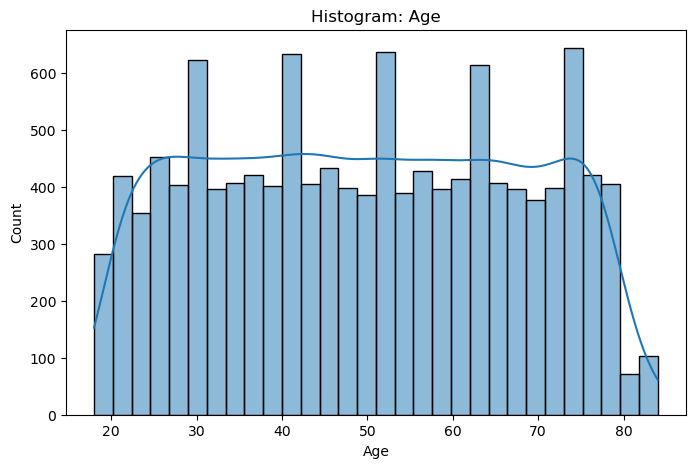

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


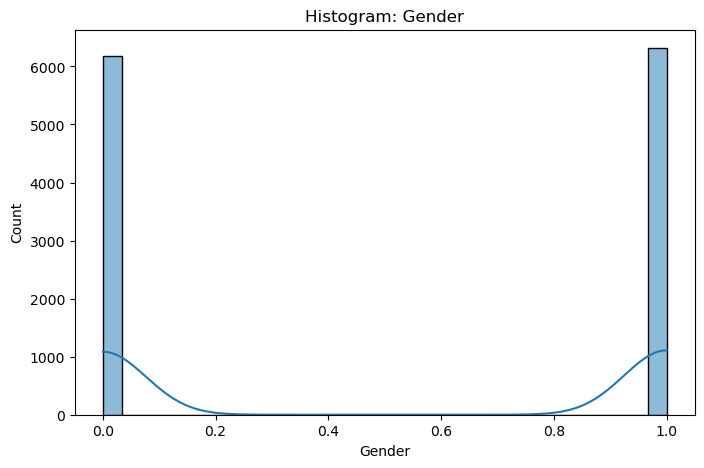

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


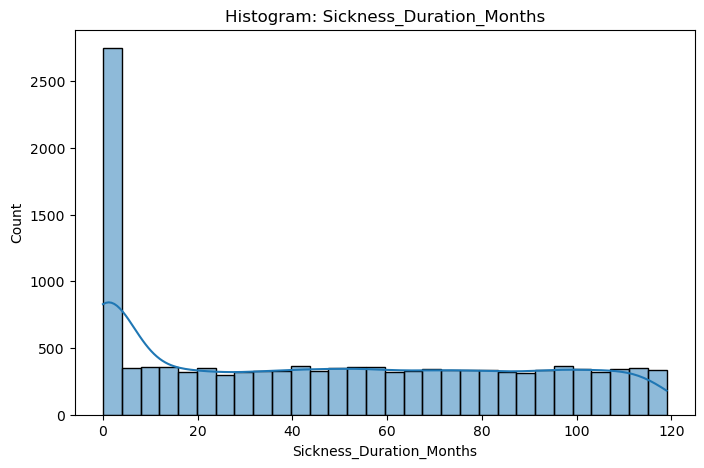

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


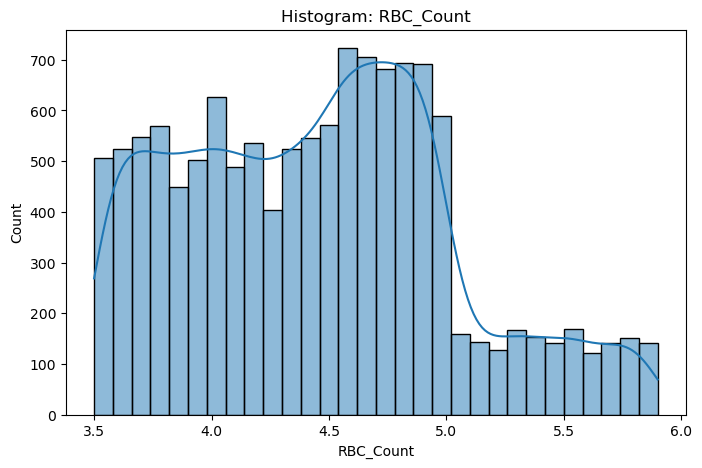

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


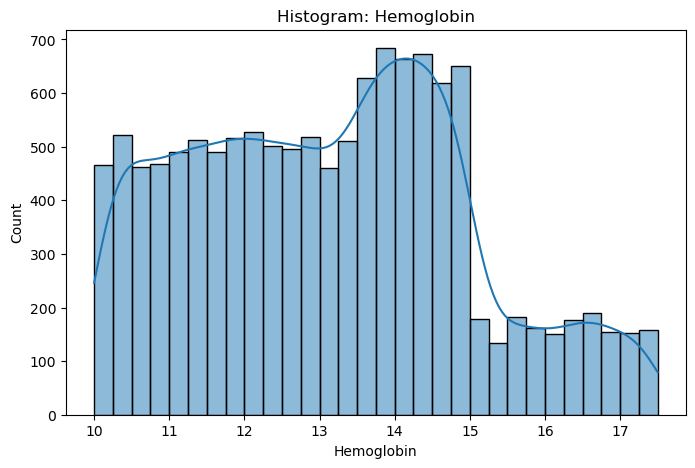

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


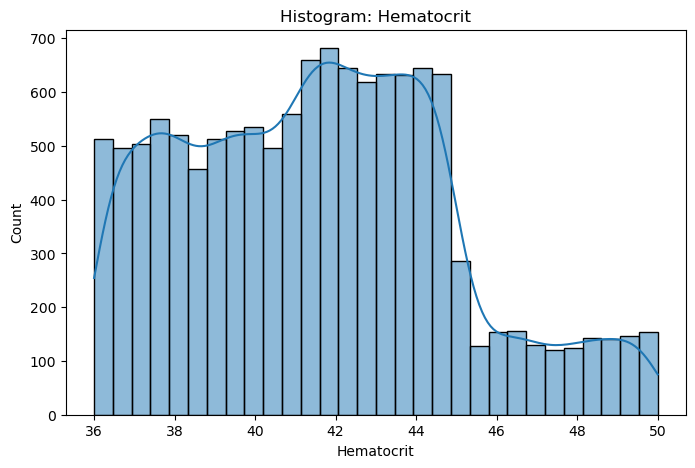

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


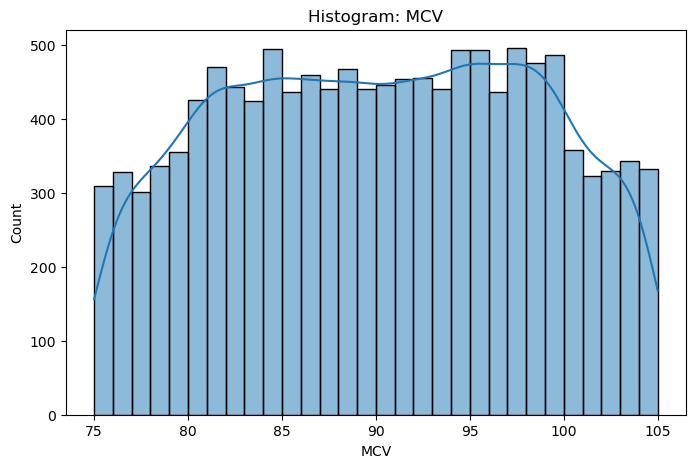

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


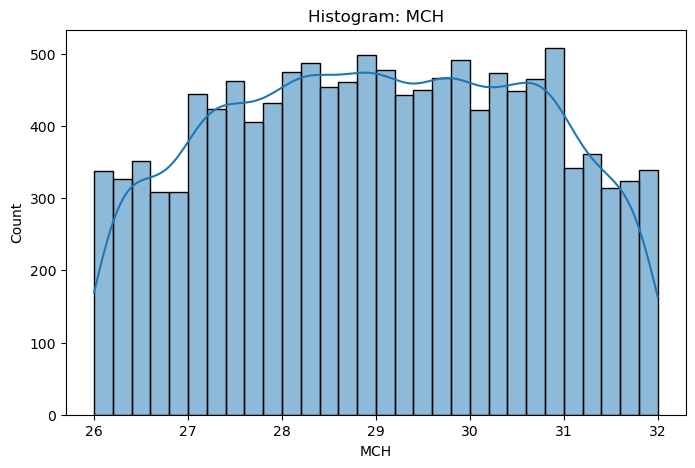

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


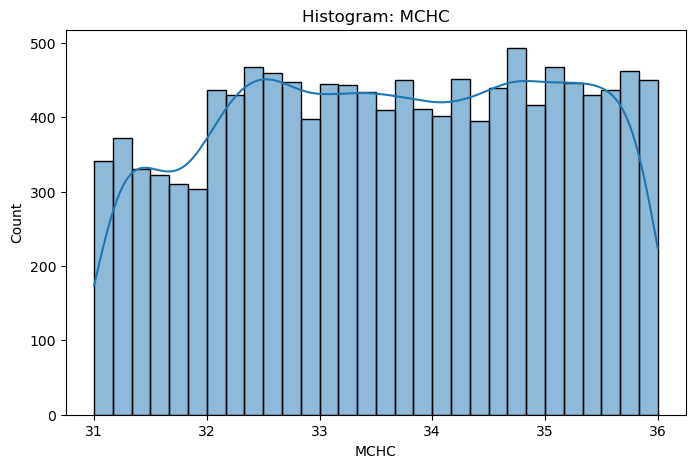

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


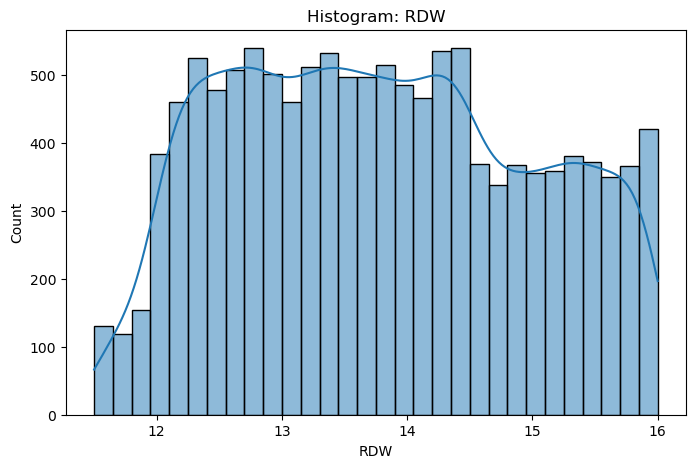

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


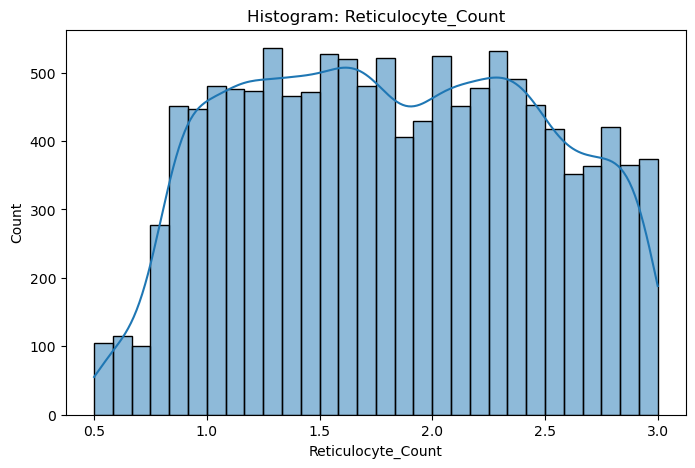

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


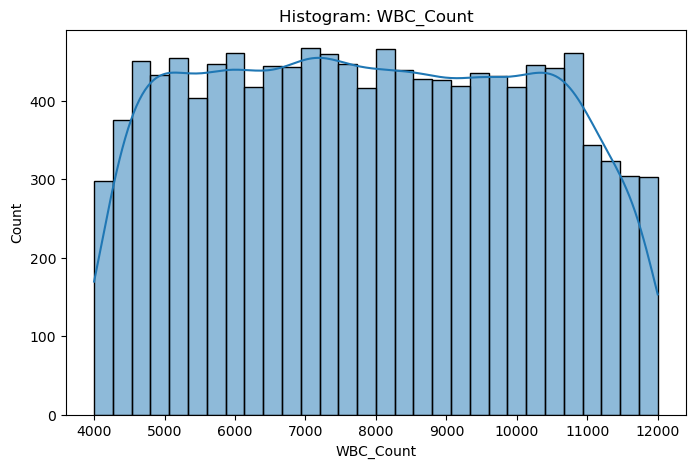

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


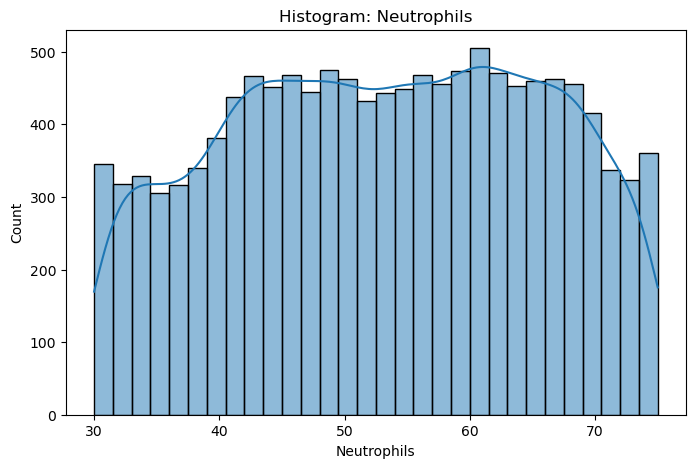

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


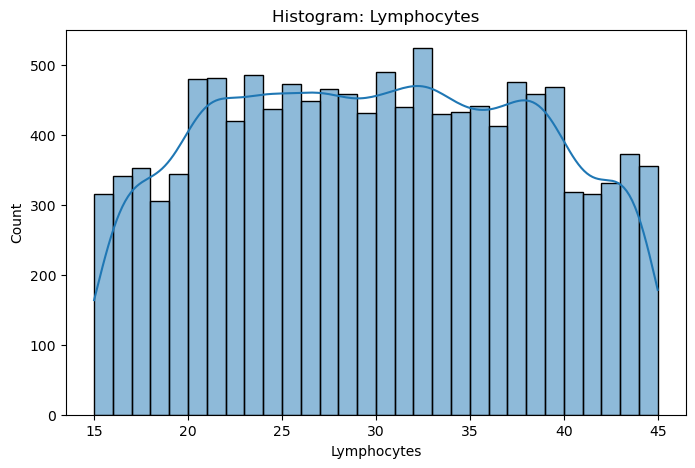

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


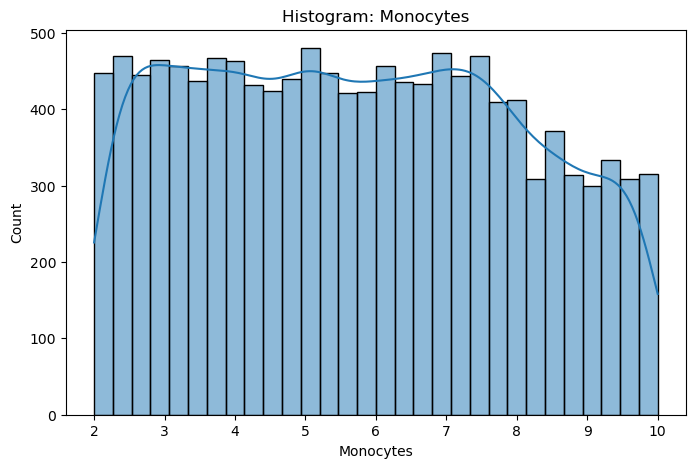

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


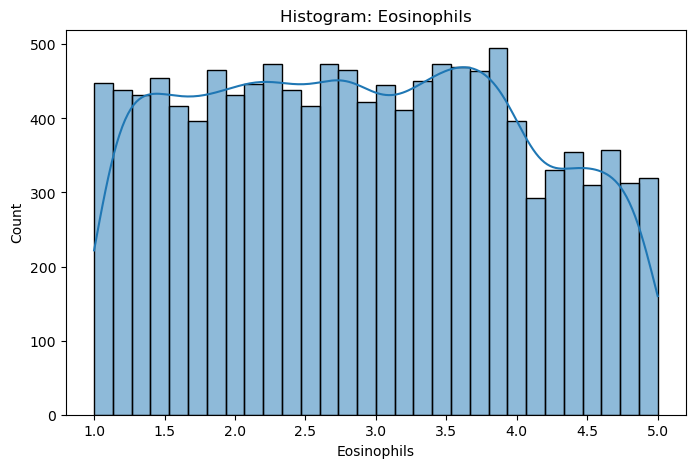

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


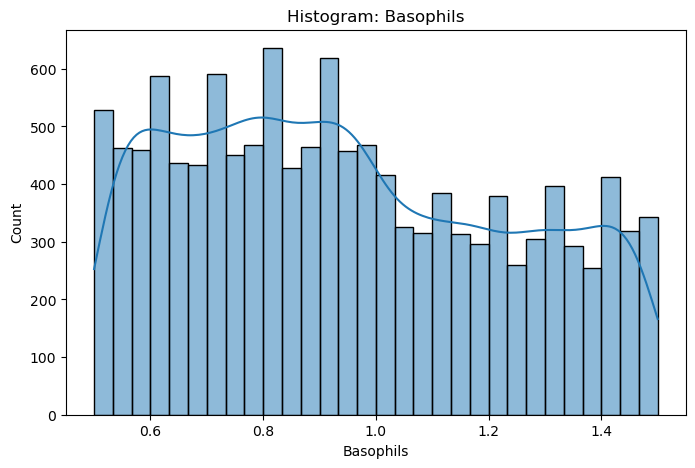

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


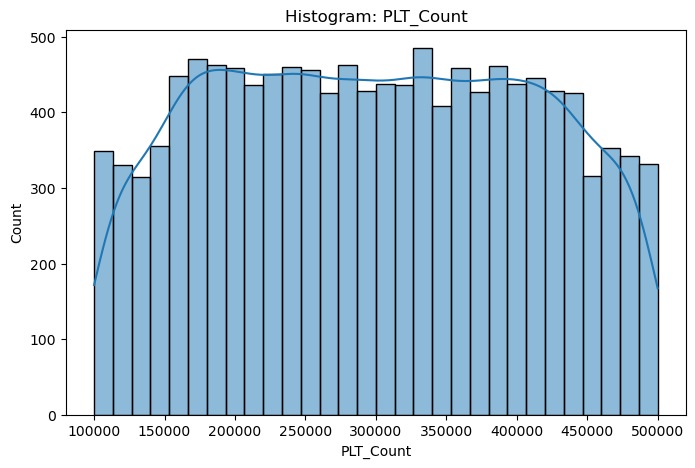

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


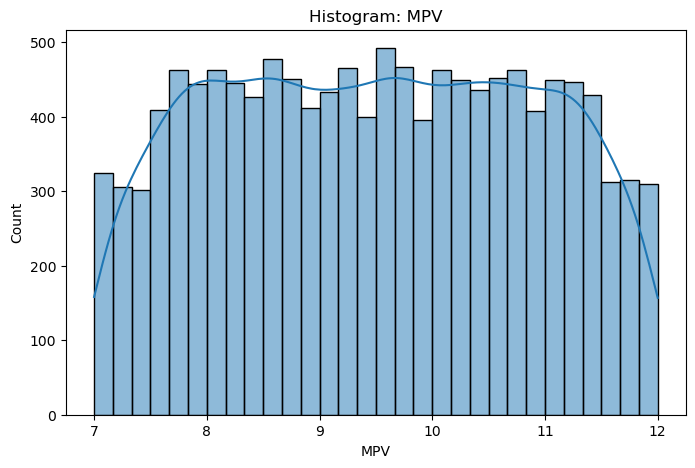

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


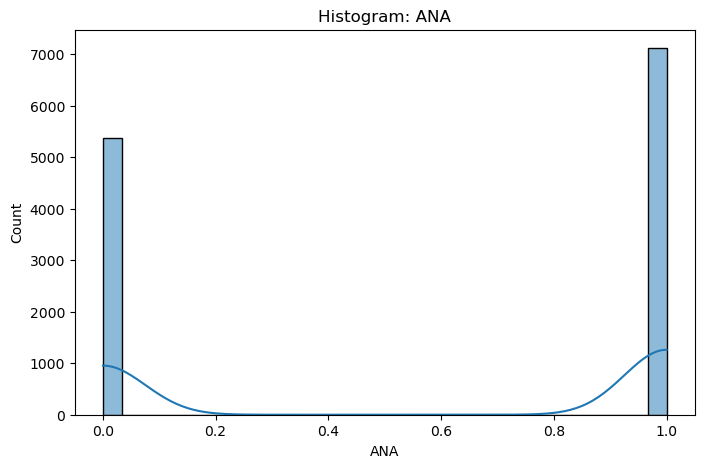

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


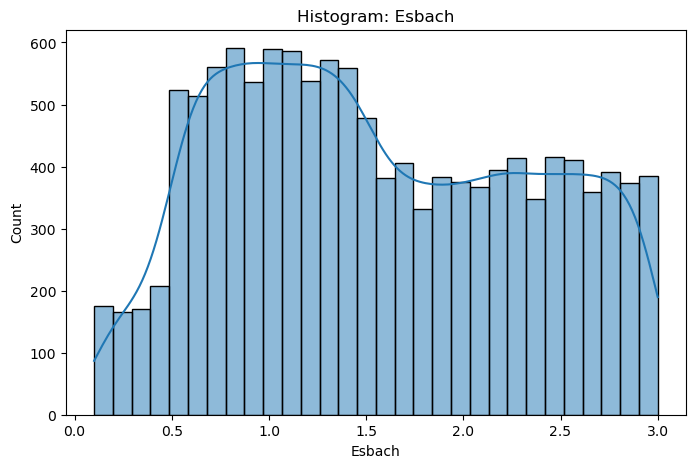

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


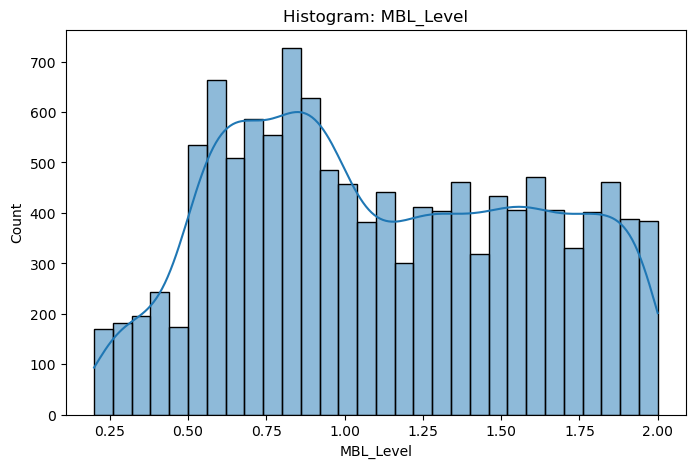

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


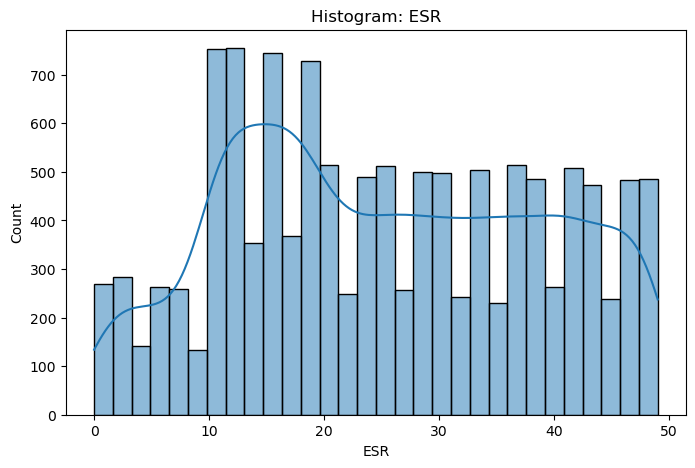

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


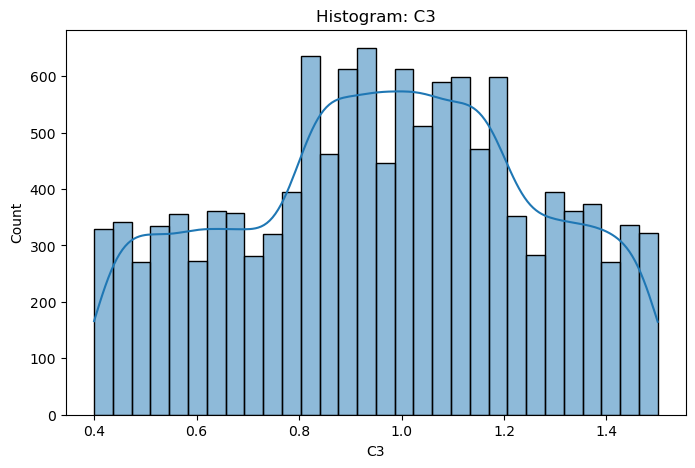

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


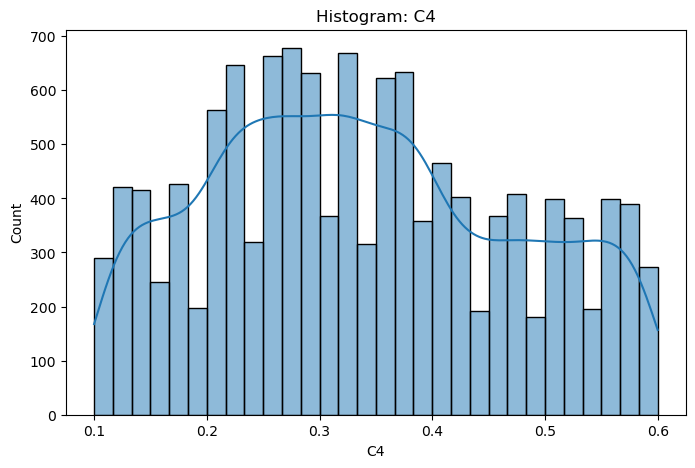

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


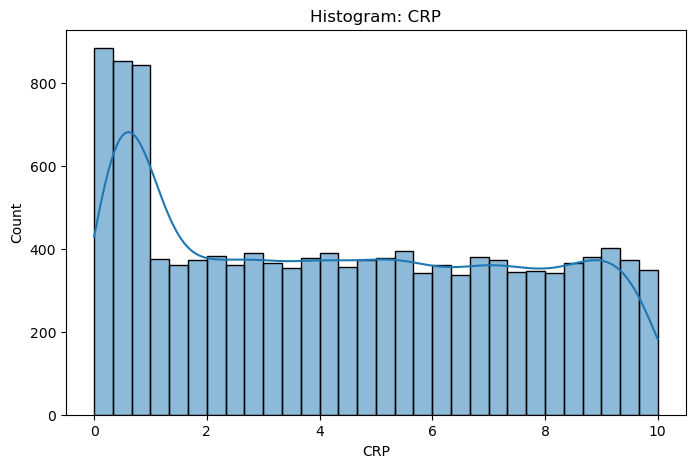

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


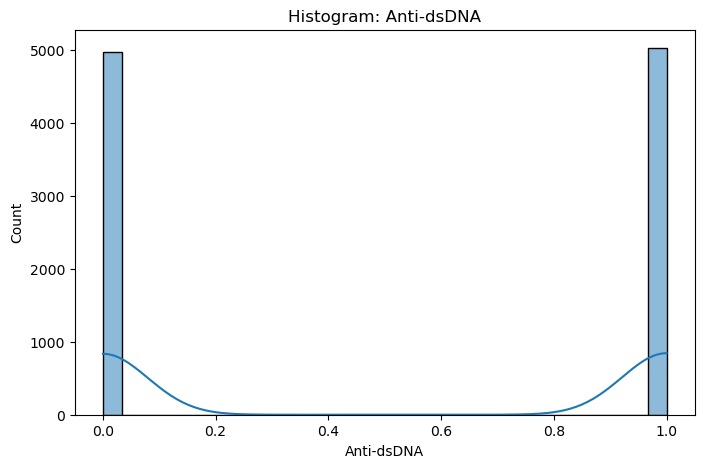

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


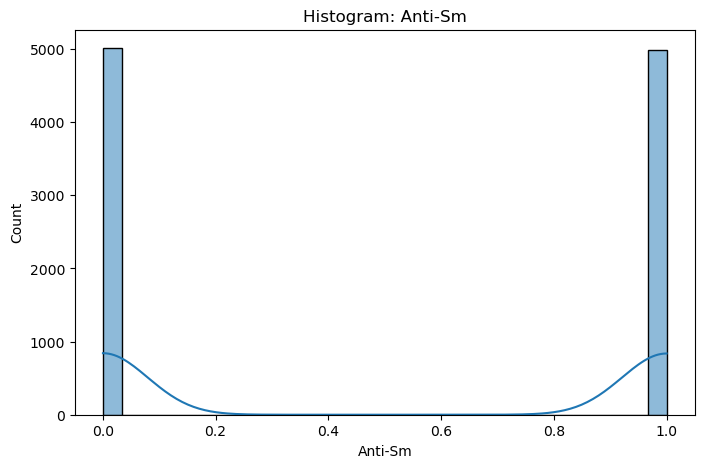

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


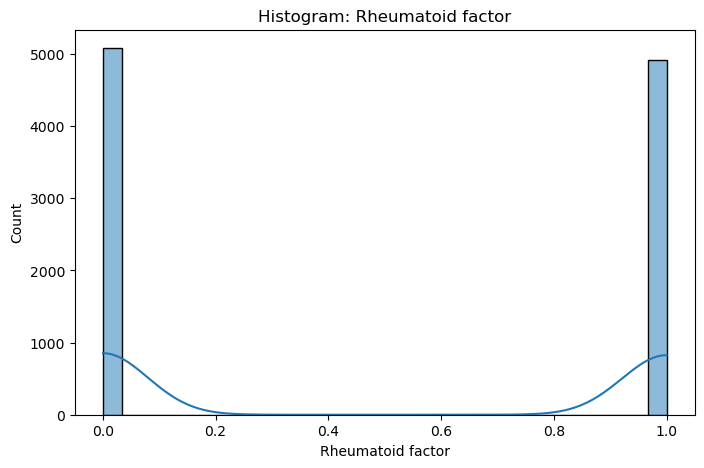

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


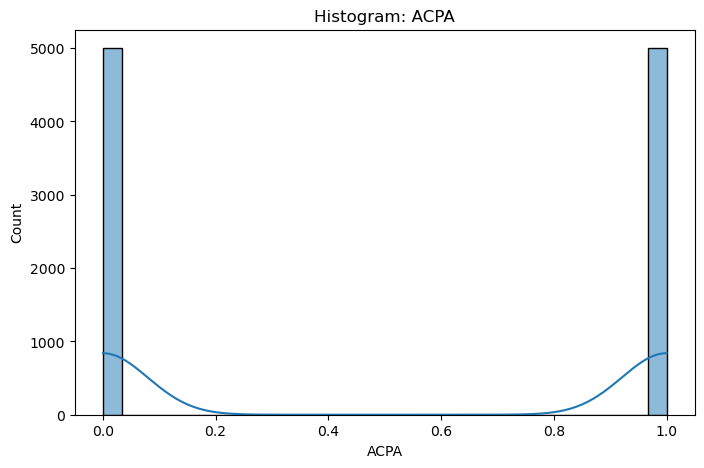

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


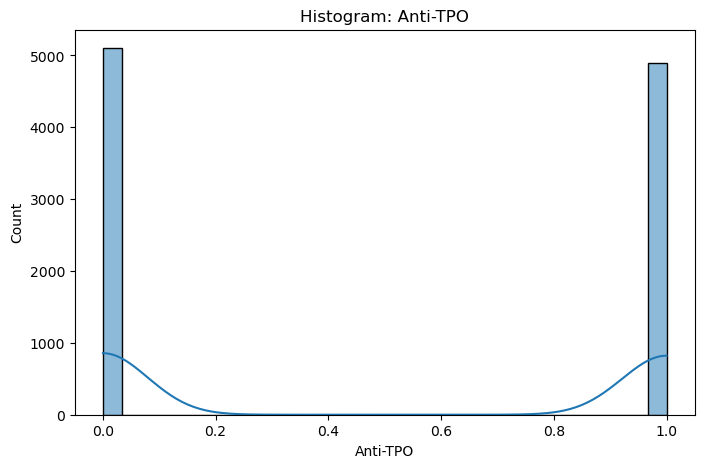

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


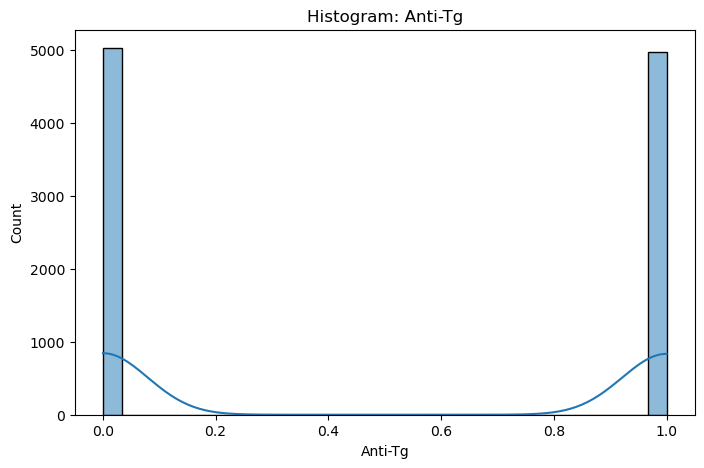

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


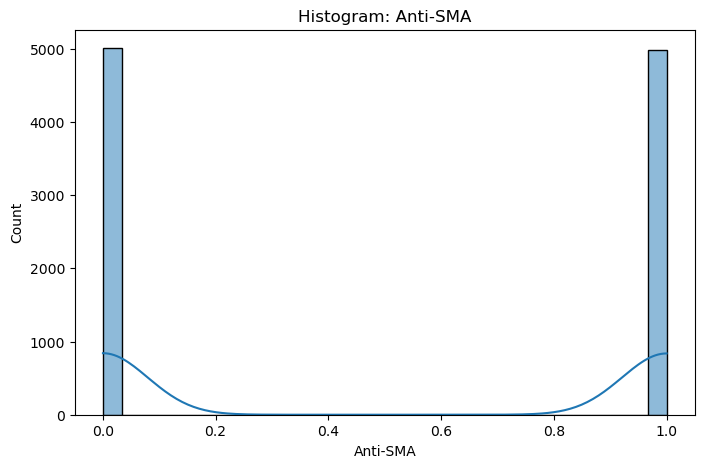

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


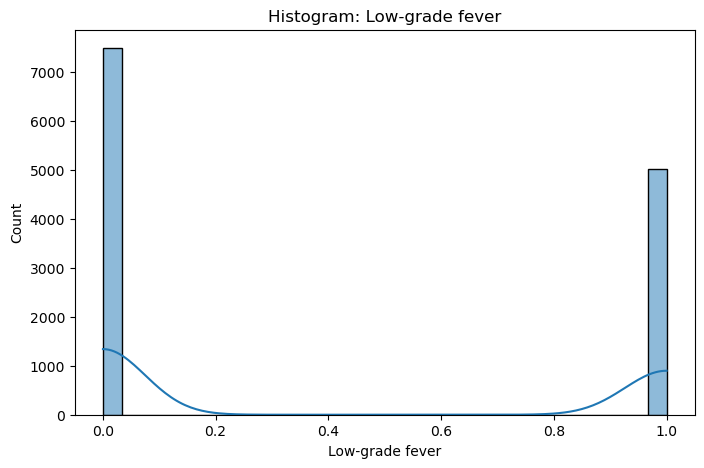

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


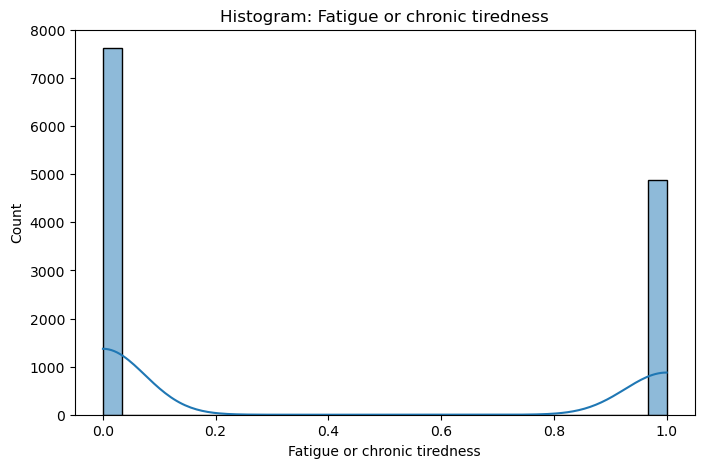

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


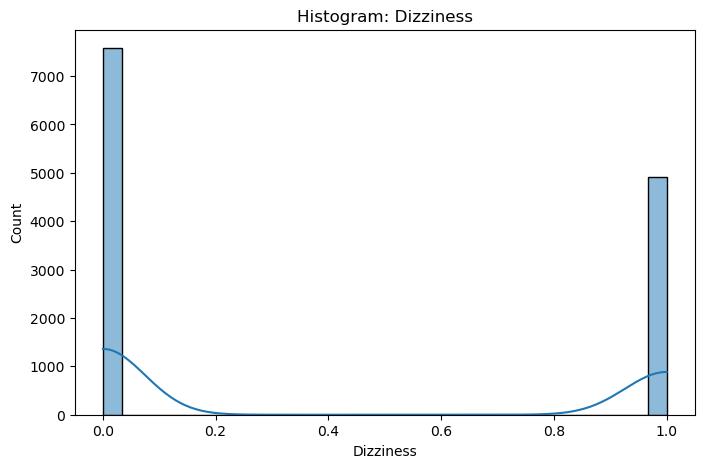

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


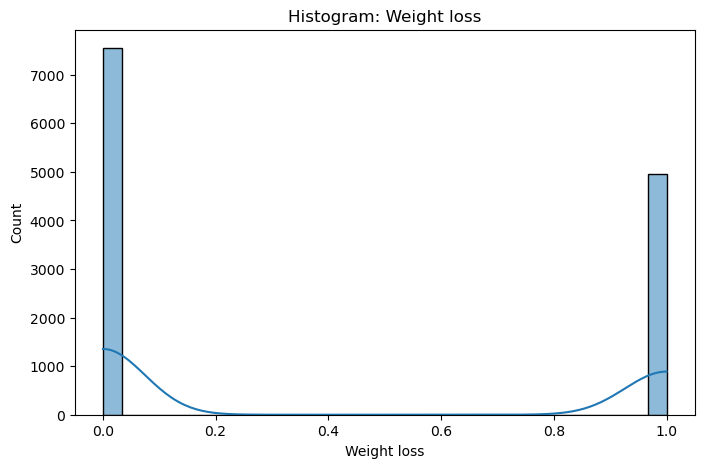

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


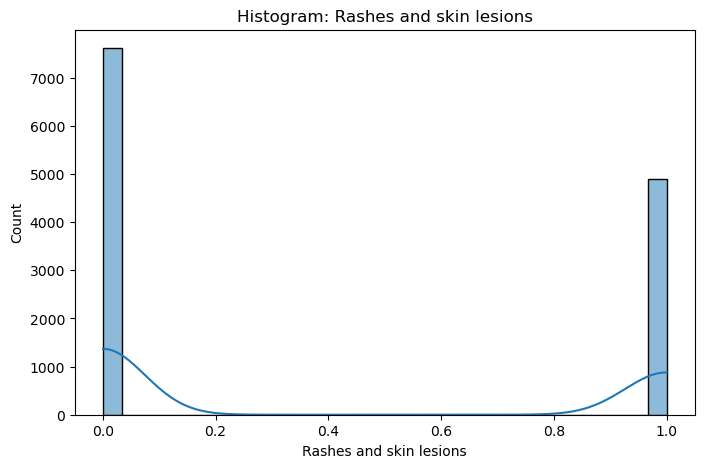

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


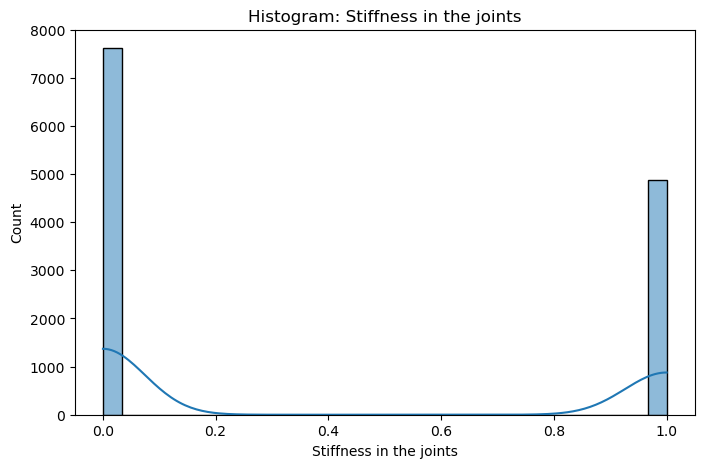

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


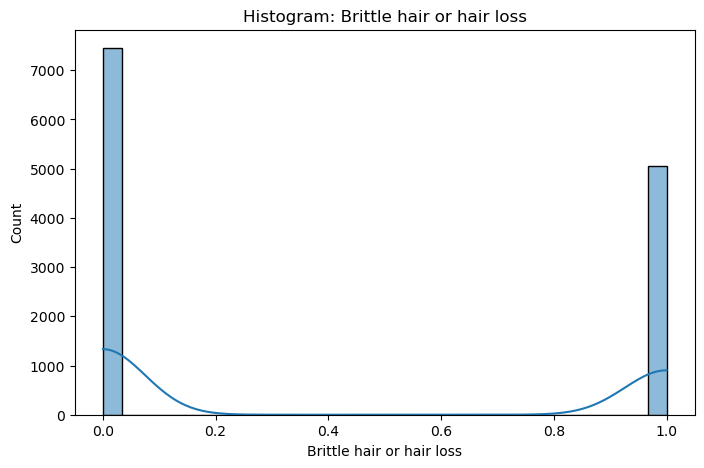

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


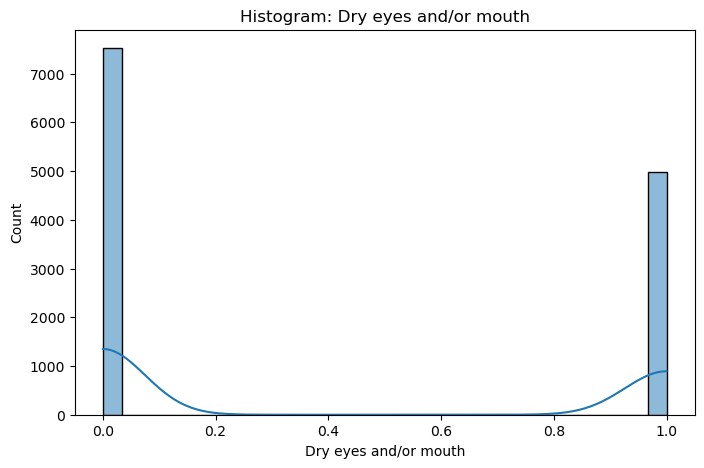

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


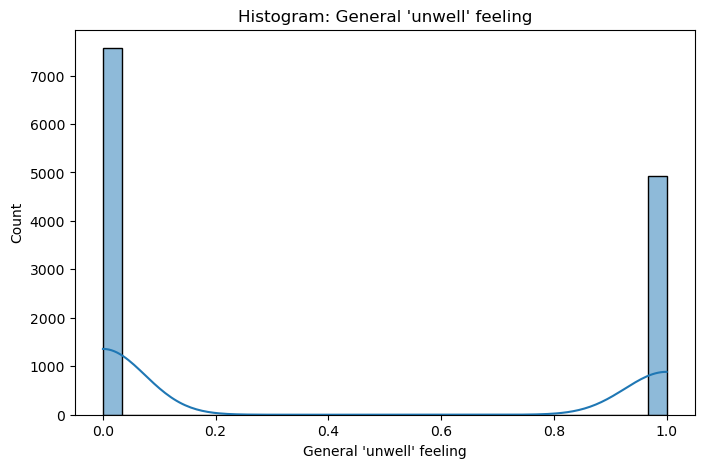

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


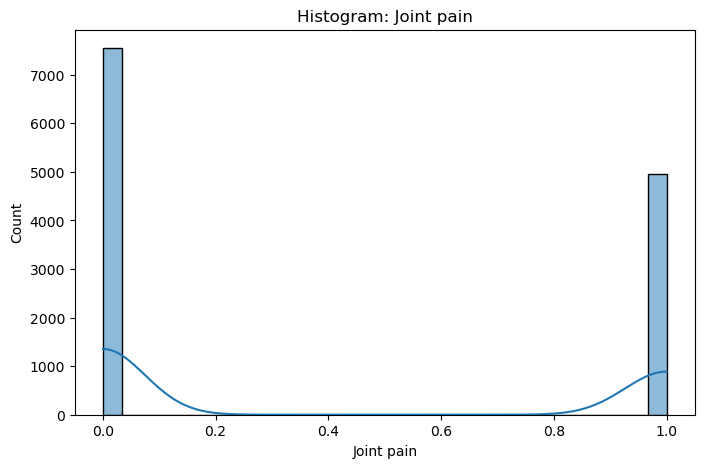

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


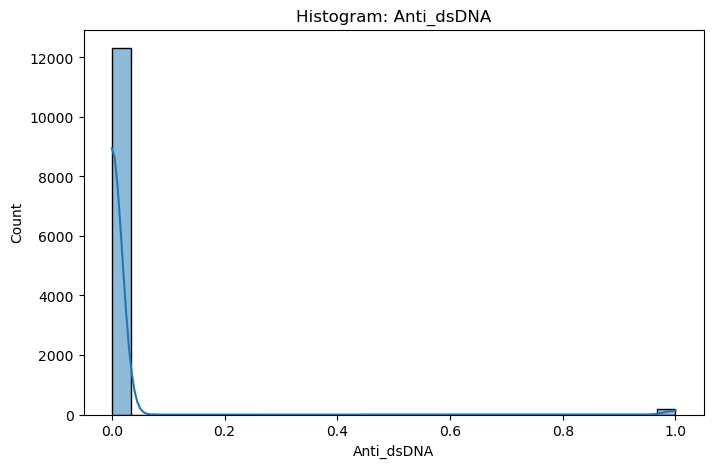

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


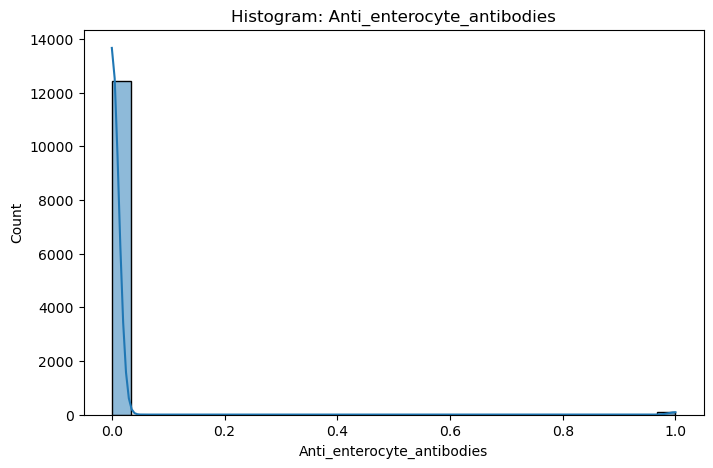

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


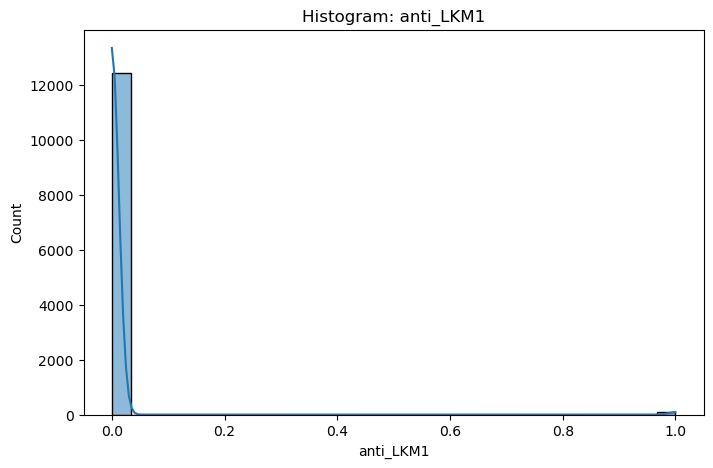

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


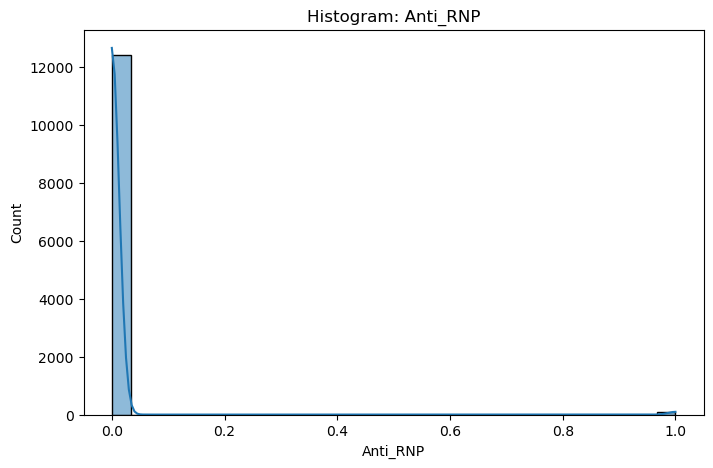

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


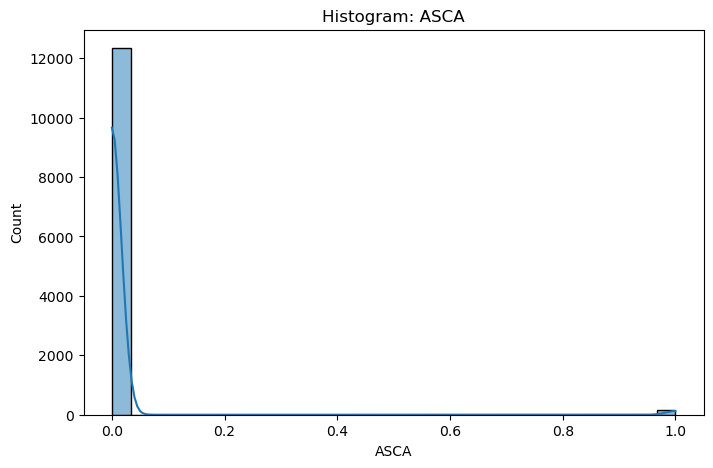

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


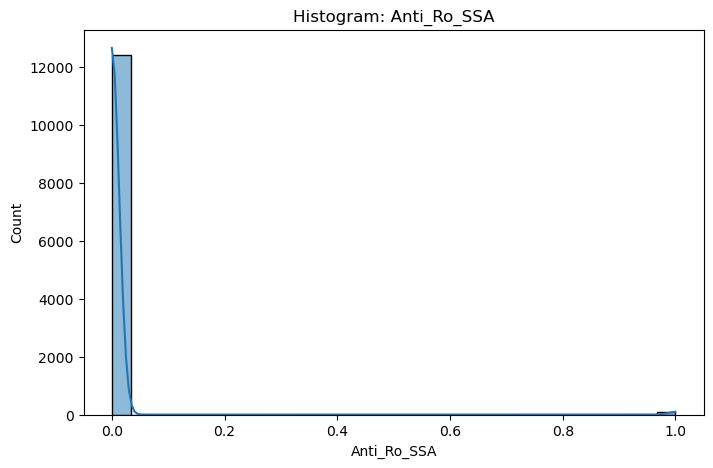

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


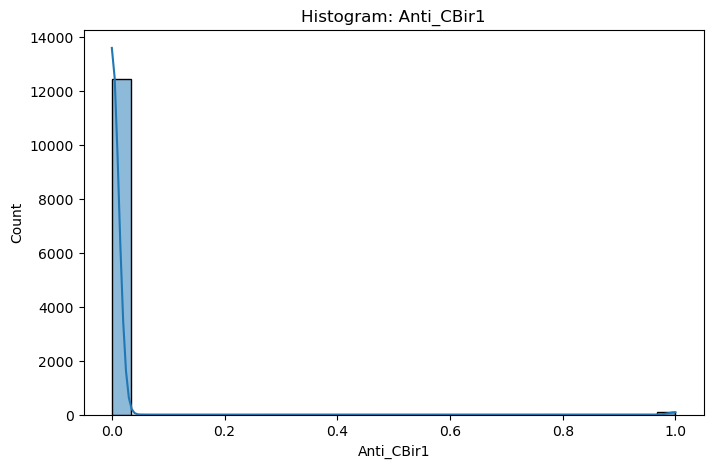

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


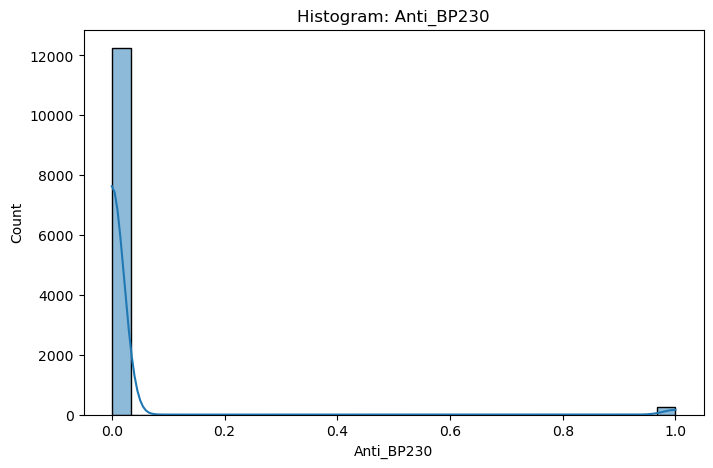

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


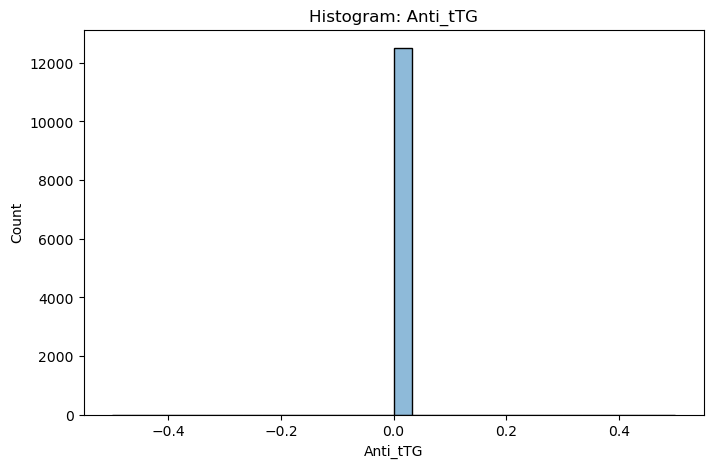

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


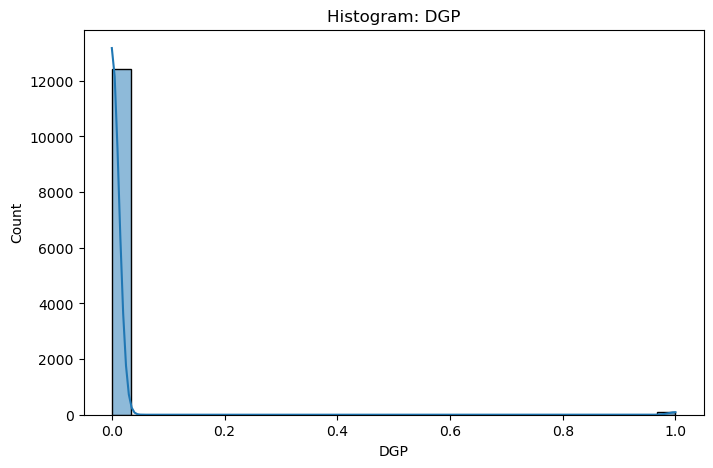

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


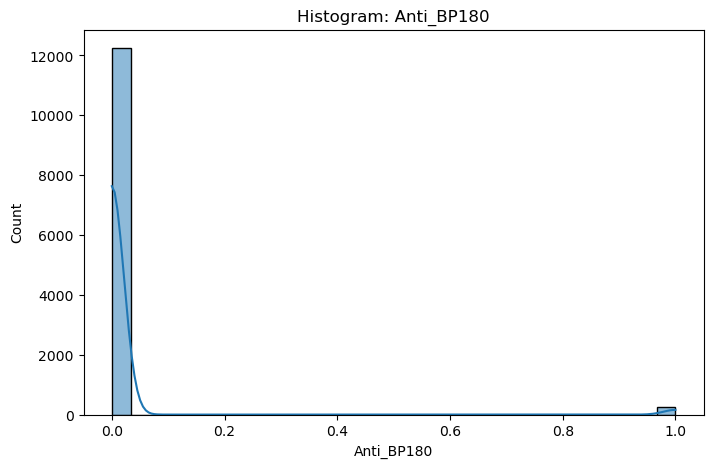

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


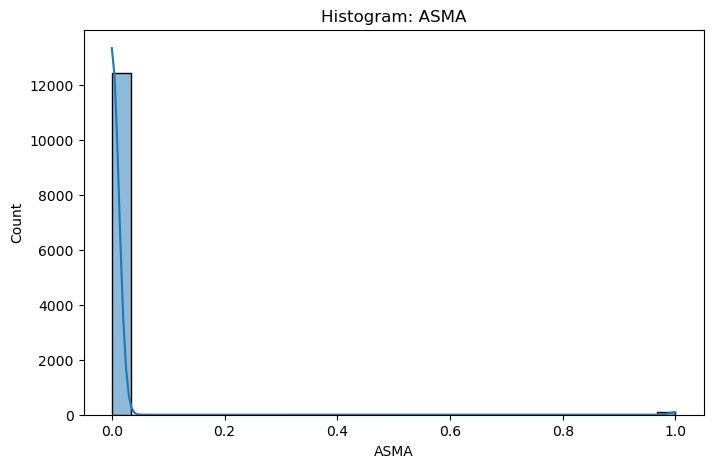

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


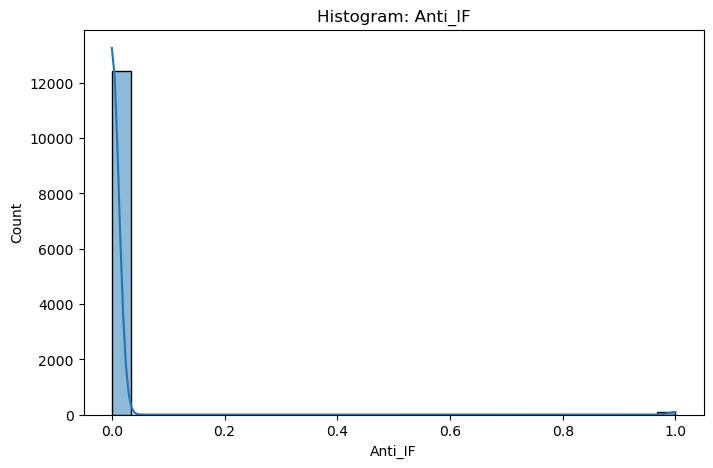

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


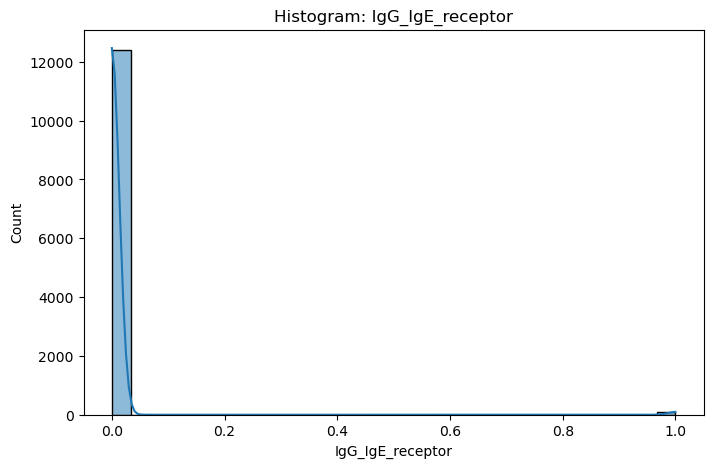

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


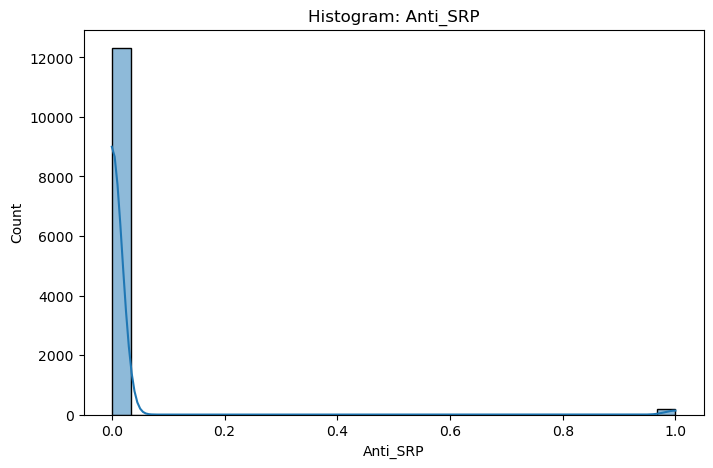

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


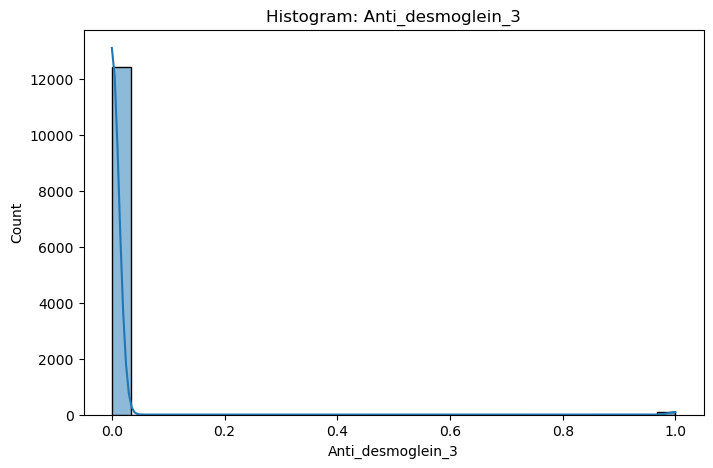

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


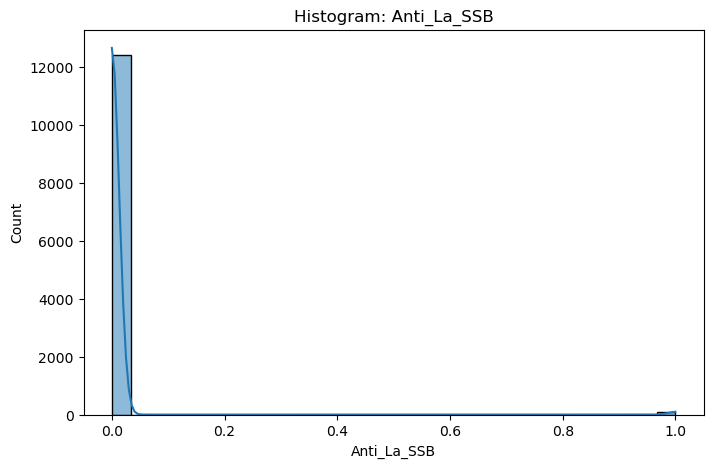

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


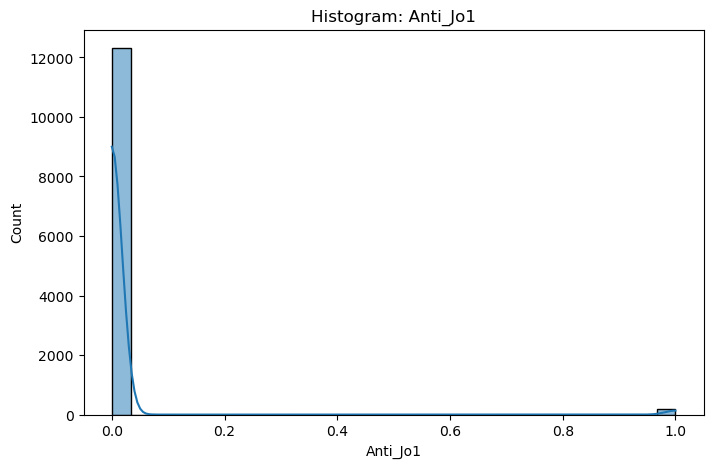

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


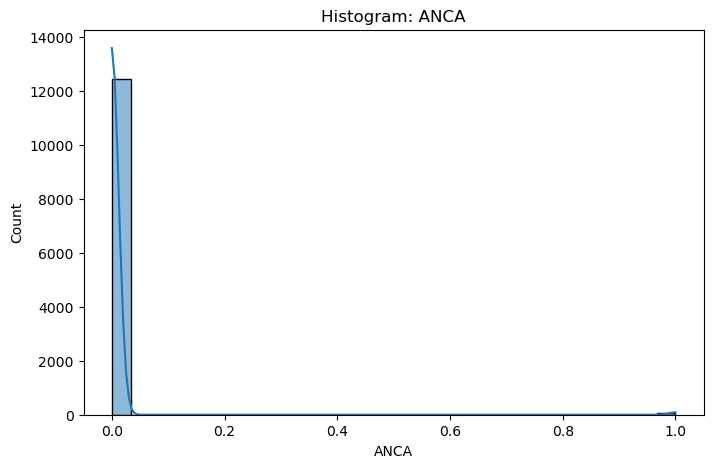

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


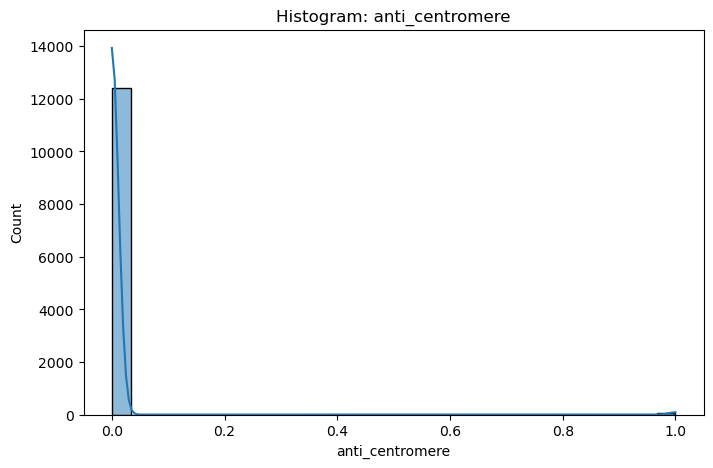

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


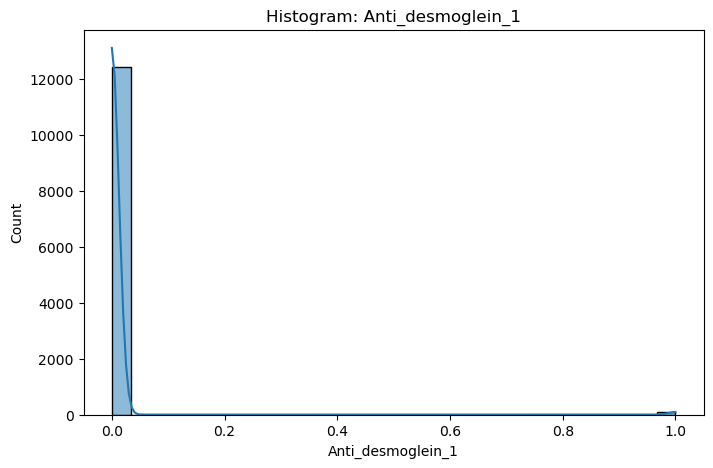

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


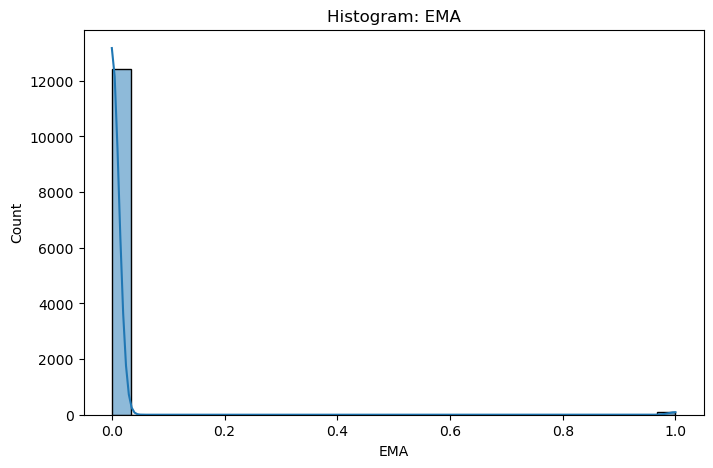

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


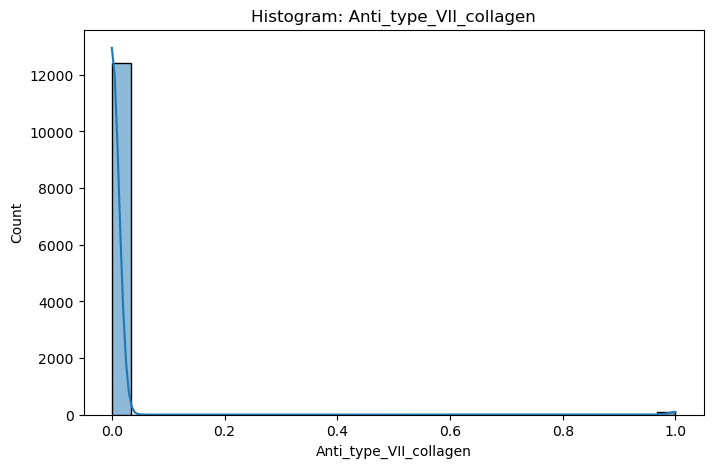

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


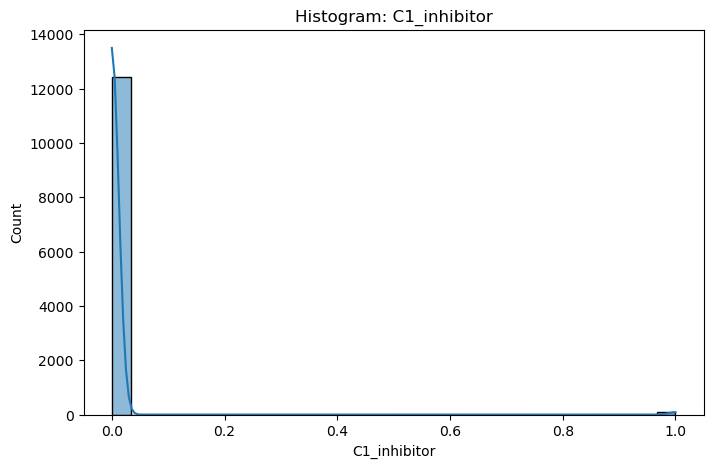

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


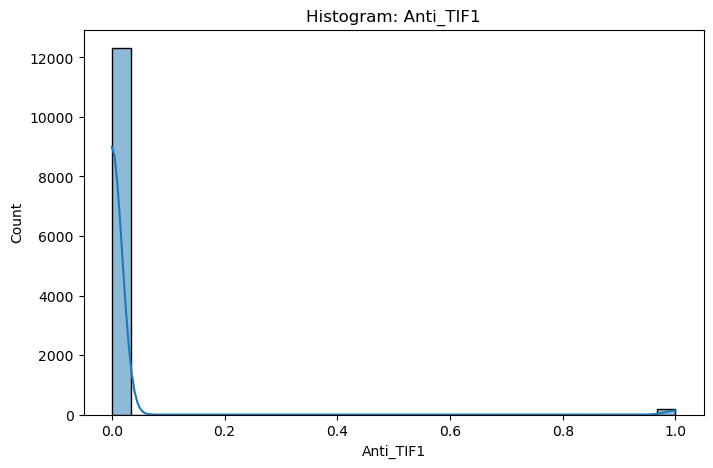

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


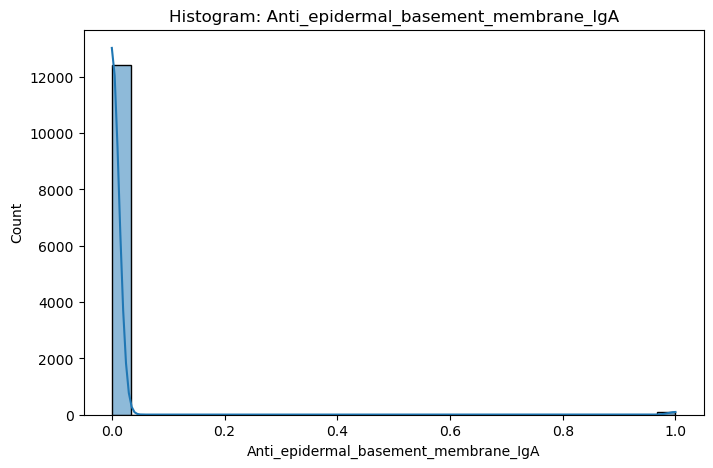

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


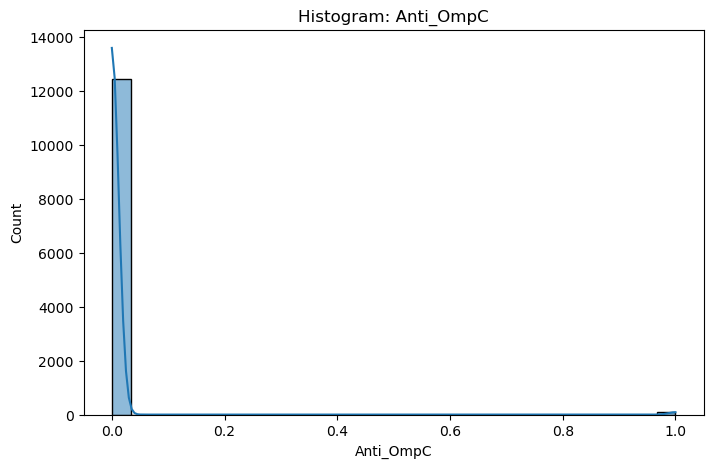

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


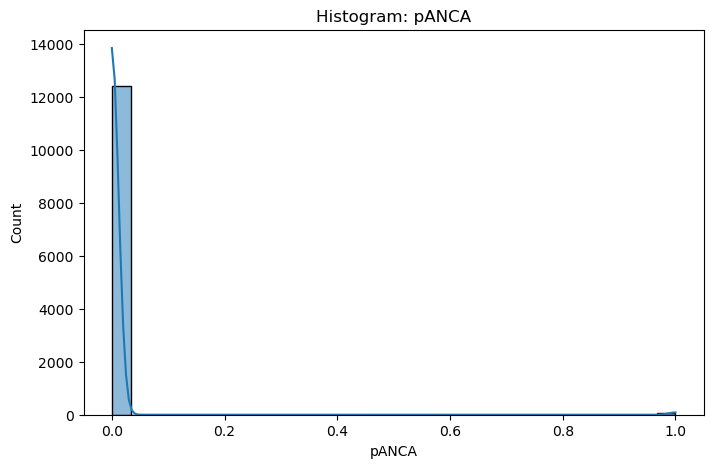

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


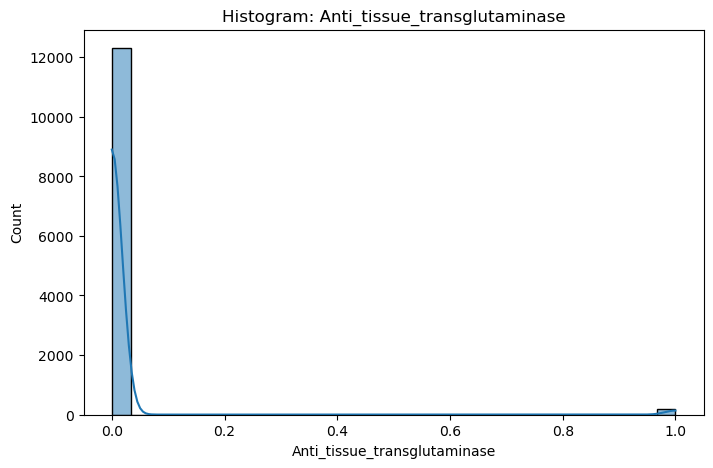

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


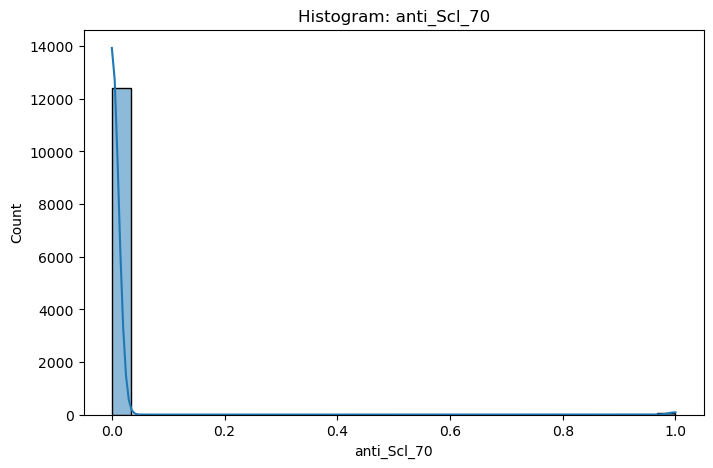

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


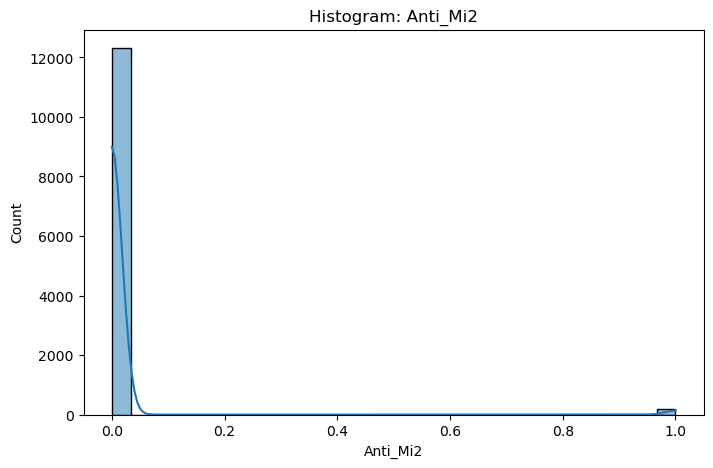

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


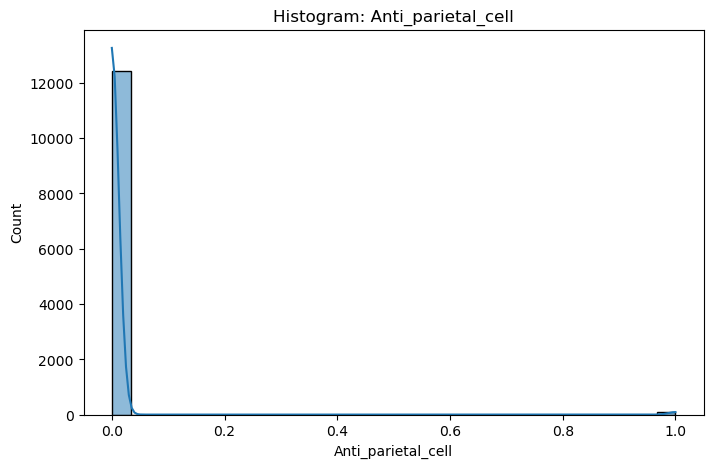

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


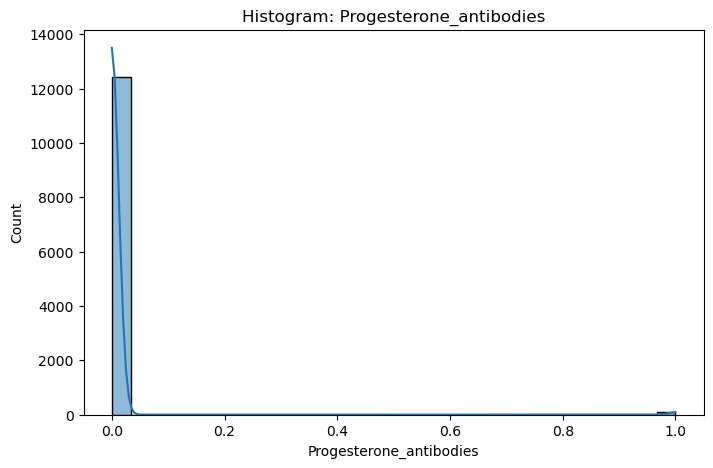

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


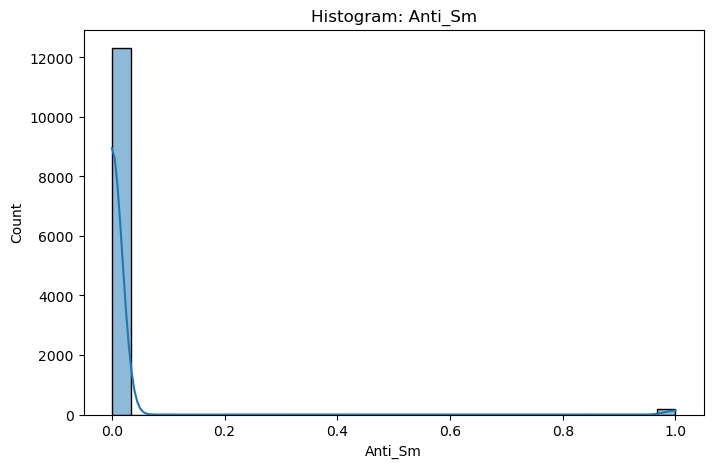

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


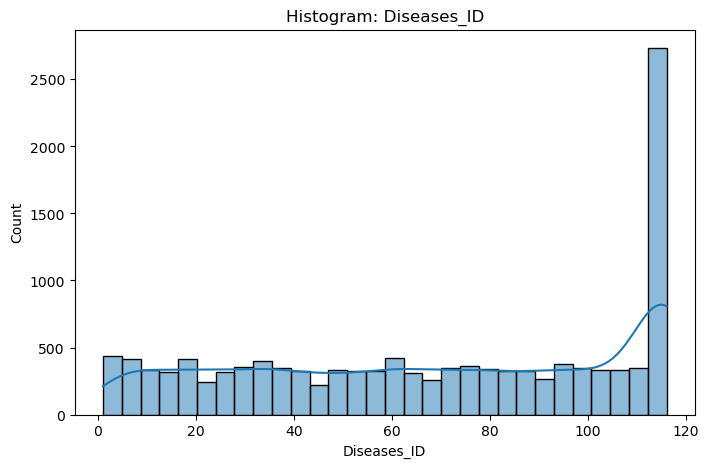

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


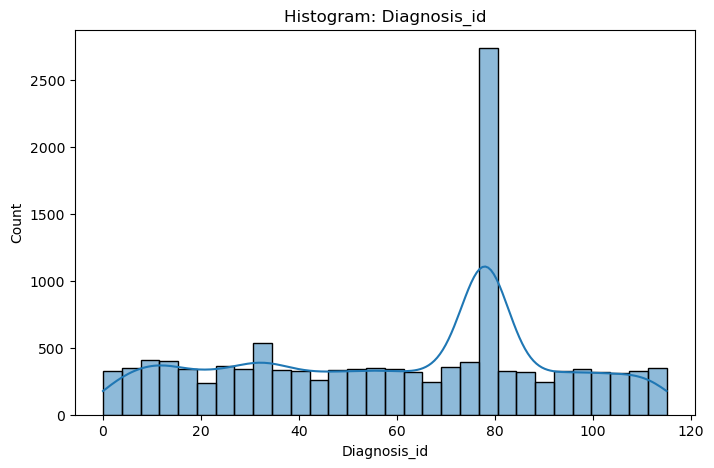

In [14]:
for col in kolumny:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=df, x=col, kde=True, bins=30)
    plt.title(f"Histogram: {col}")
    plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


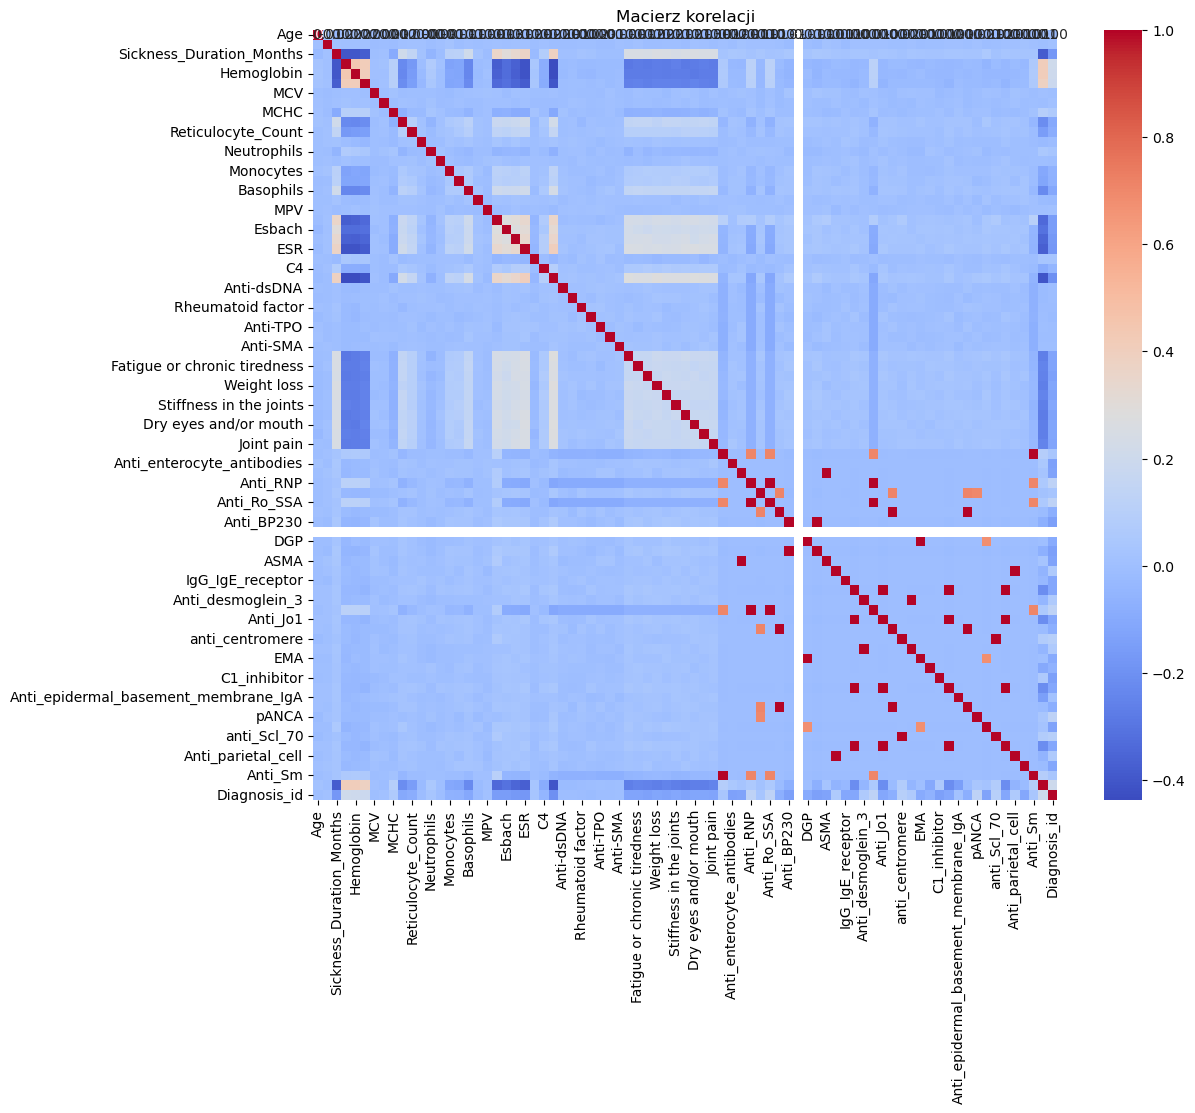

In [16]:
corr_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Macierz korelacji")
plt.show()

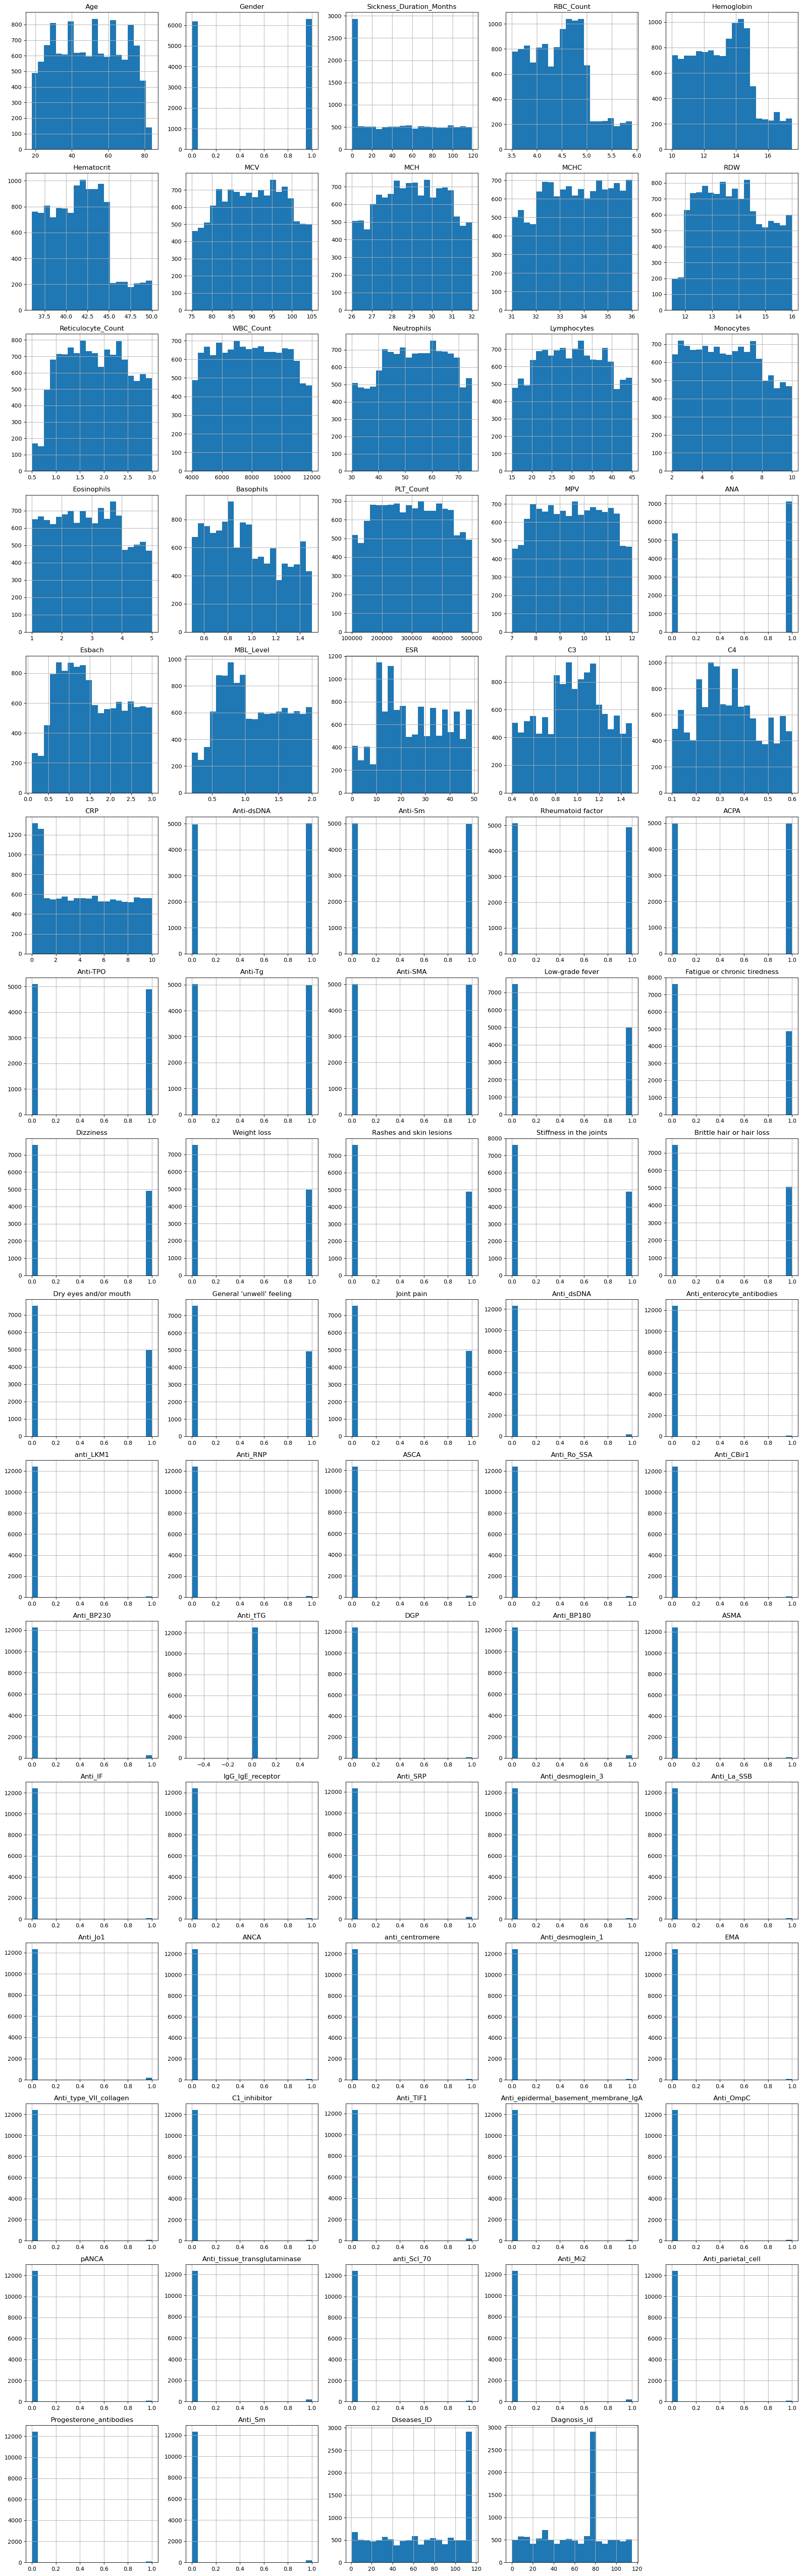

In [23]:
# Filtrowanie tylko kolumn numerycznych
num_cols = df.select_dtypes(include=['number']).columns

# Obliczenie wymaganego układu
num_plots = len(num_cols)
cols = 5  # Liczba wykresów w jednym wierszu
rows = int(np.ceil(num_plots / cols))  # Liczba wierszy

# Tworzenie histogramów dla wszystkich kolumn numerycznych
df[num_cols].hist(bins=20, figsize=(20, rows * 4), layout=(rows, cols))
plt.tight_layout()
plt.show()